In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import nltk
import string
import json
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
train = pd.read_csv('train.csv')
train

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action


In [12]:
train.shape

(54000, 4)

In [6]:
train.describe()

,id
count,54000.000000
mean,44994.882352
std,25980.135904
min,0.000000
25%,22569.750000
50%,45000.000000
75%,67466.250000
max,89999.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54000 non-null  int64 
 1   movie_name  54000 non-null  object
 2   synopsis    54000 non-null  object
 3   genre       54000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
train.isnull().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [9]:
train['genre'].value_counts()

genre
fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: count, dtype: int64

<ipython-input-10-c77723e6f487>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


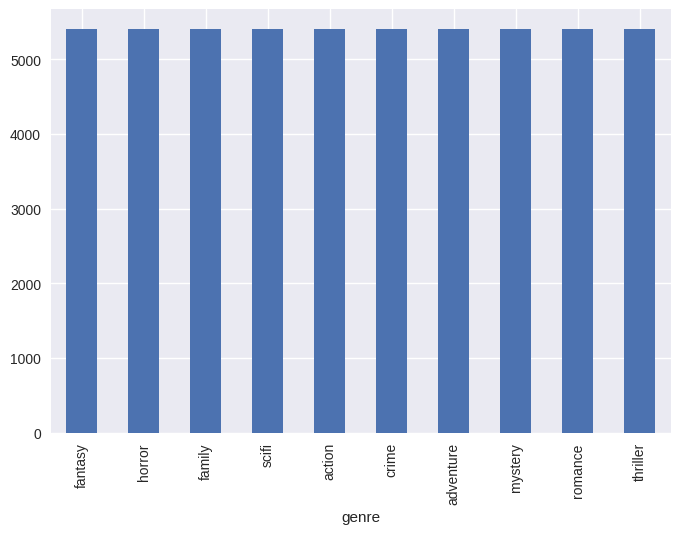

In [10]:
plt.style.use('seaborn')
train['genre'].value_counts().plot(kind = 'bar')
plt.show()

In [13]:
# Here we have 'train' as your DataFrame and the target column as 'genre'
X = train.drop(columns=['genre'])  # Features
y = train['genre']  # Target variable

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(43200, 3) (10800, 3)
(43200,) (10800,)


In [26]:
# Function to clean the text
def clean_text(text):
    text = re.sub("\'", "", text)  # Remove single quotes
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = ' '.join(text.split())  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

In [27]:
# Apply the clean_text function to the 'synopsis' column in both training and test sets
X_train['clean_plot'] = X_train['synopsis'].apply(lambda x: clean_text(x))
X_test['clean_plot'] = X_test['synopsis'].apply(lambda x: clean_text(x))

# Display the first few rows to verify
print(X_train[['synopsis', 'clean_plot']].head())
print(X_test[['synopsis', 'clean_plot']].head())

                                                synopsis  \
5688   Michael and Franziska's relationship suffers f...   
40513  An out of work husband takes his wife's advice...   
17163  A mother and her young son move to a new town ...   
39180  A tug-of-war between Elmo and his friend sends...   
7905   A female warrior who was raised as a man joins...   

                                              clean_plot  
5688   michael and franziskas relationship suffers fr...  
40513  an out of work husband takes his wifes advice ...  
17163  a mother and her young son move to a new town ...  
39180  a tug of war between elmo and his friend sends...  
7905   a female warrior who was raised as a man joins...  
                                                synopsis  \
30246  A socialite must protect her child from the gh...   
34164  When a space shuttle crashes to earth the daug...   
40692  The legend of Yamashita's Gold lures a treasur...   
28724  A new take on the classic story of a g

In [28]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(43200, 4) (10800, 4)
(43200,) (10800,)


In [29]:
X_train

,id,movie_name,synopsis,clean_plot
5688,71678,"Auf Wiedersehn, Franziska!",Michael and Franziska's relationship suffers f...,michael and franziskas relationship suffers fr...
40513,6510,Now Hiring,An out of work husband takes his wife's advice...,an out of work husband takes his wifes advice ...
17163,45628,H.A.R.M.,A mother and her young son move to a new town ...,a mother and her young son move to a new town ...
39180,30542,The Adventures of Elmo in Grouchland,A tug-of-war between Elmo and his friend sends...,a tug of war between elmo and his friend sends...
7905,49308,Dororo,A female warrior who was raised as a man joins...,a female warrior who was raised as a man joins...
...,...,...,...,...
11284,60949,Carnival of Crime,"A four-alarm murder mystery, this nerve-tingli...",a four alarm murder mystery this nerve tinglin...
44732,41418,Never After,"Years after the storybooks have closed, our be...",years after the storybooks have closed our bel...
38158,66203,Phagun,"Banani is the daughter of a rich man, brought ...",banani is the daughter of a rich man brought u...
860,22589,Sonny,An honorably discharged soldier returns home t...,an honorably discharged soldier returns home t...


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43200 entries, 5688 to 15795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          43200 non-null  int64 
 1   movie_name  43200 non-null  object
 2   synopsis    43200 non-null  object
 3   clean_plot  43200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


               word  count
0           michael    114
1               and  29609
2        franziskas      1
3      relationship    467
4           suffers     87
...             ...    ...
41704     honorably      1
41705         timar      1
41706         gabon      1
41707    equatorial      1
41708    libreville      1

[41709 rows x 2 columns]
          word  count
34           a  68287
6          the  56015
24          to  36887
38          of  32818
1          and  29609
...        ...    ...
1114      wife   1173
235       goes   1163
484       down   1159
32         war   1147
195   daughter   1144

[100 rows x 2 columns]


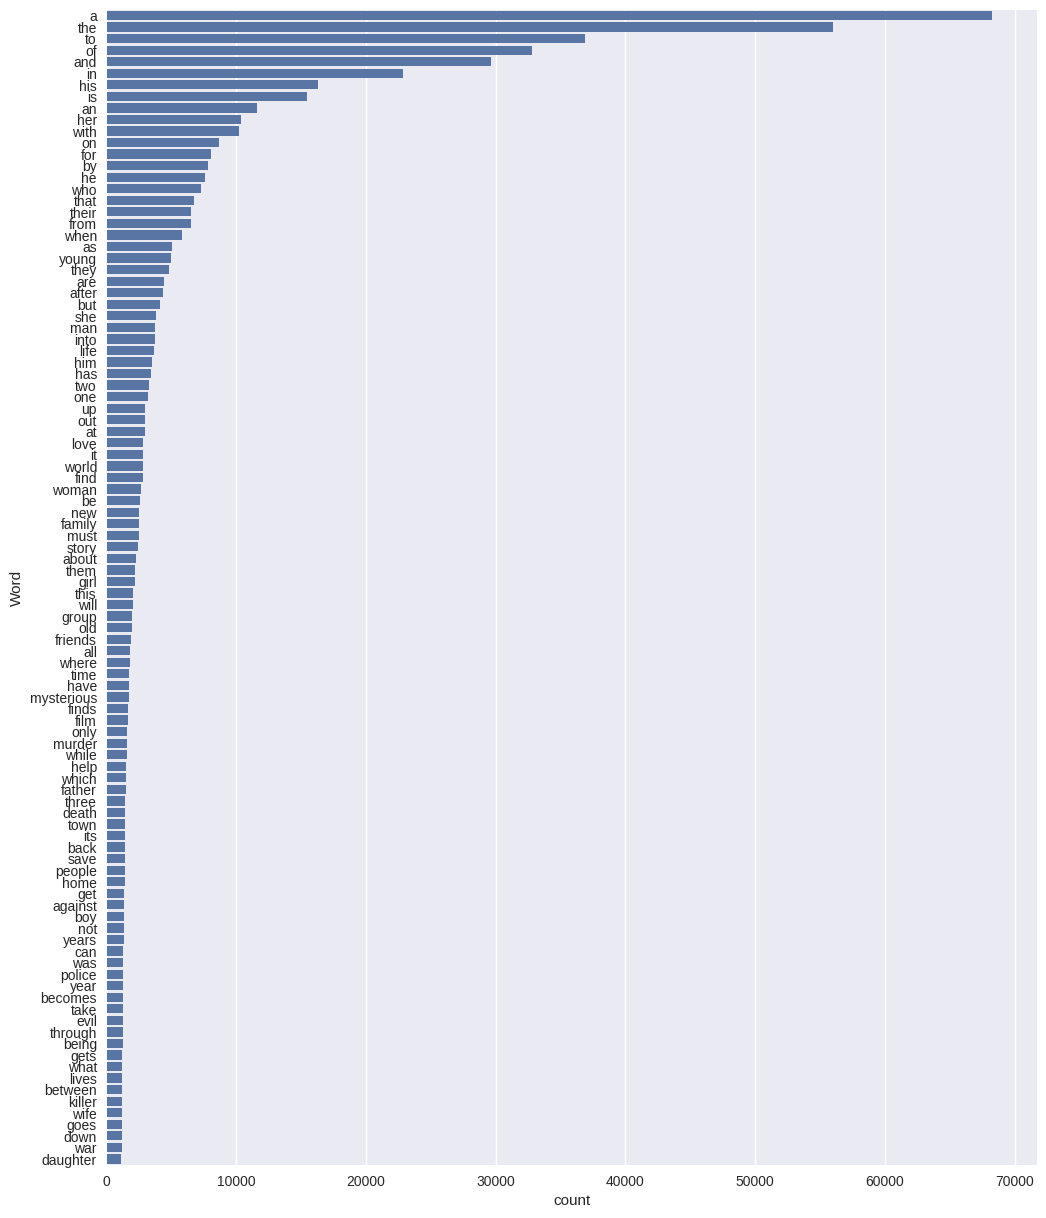

In [31]:
# Function to plot the frequency of words in the 'synopsis' column
def freq_words(x, terms=30):
    # Combine all plot summaries into one long string
    all_words = ' '.join([text for text in x])

    # Split the string into individual words
    all_words = all_words.split()

    # Calculate the frequency distribution of words
    fdist = nltk.FreqDist(all_words)

    # Convert the frequency distribution to a DataFrame
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    print(words_df)

    # Get the top 'terms' most frequent words
    d = words_df.nlargest(columns="count", n=terms)
    print(d)

    # Plot the top 'terms' most frequent words using a bar plot
    plt.figure(figsize=(12, 15))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel='Word')
    plt.show()


freq_words(X_train['clean_plot'], 100)


In [33]:
# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

X_train['clean_plot'] = X_train['clean_plot'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


               word  count
0           michael    114
1        franziskas      1
2      relationship    467
3           suffers     87
4       separations      3
...             ...    ...
41567     honorably      1
41568         timar      1
41569         gabon      1
41570    equatorial      1
41571    libreville      1

[41572 rows x 2 columns]
       word  count
41    young   4939
80      man   3727
121    life   3675
91      two   3287
94      one   3176
...     ...    ...
562    plot    723
122    four    713
2340  human    708
400    lost    703
428    true    695

[100 rows x 2 columns]


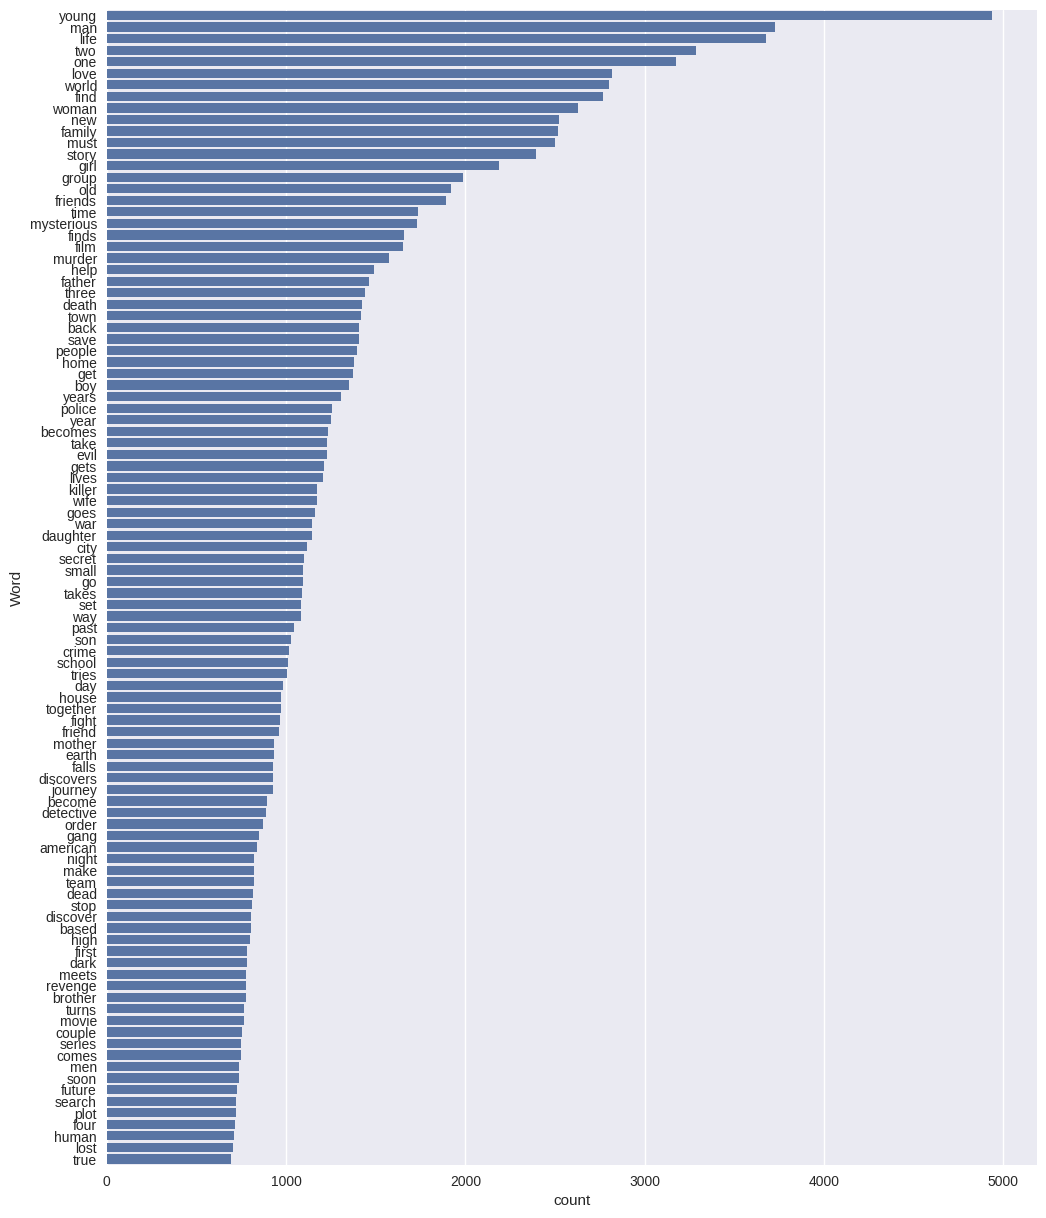

In [35]:
freq_words(X_train['clean_plot'], 100)

In [37]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_plot'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test['clean_plot'])

# Verify the shapes of the transformed data
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(43200, 41554)
(10800, 41554)


In [38]:
X_train_tfidf

<43200x41554 sparse matrix of type '<class 'numpy.float64'>'
	with 633015 stored elements in Compressed Sparse Row format>

In [47]:
y_train.info()
y_train.head()

<class 'pandas.core.series.Series'>
Index: 43200 entries, 5688 to 15795
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
43200 non-null  object
dtypes: object(1)
memory usage: 675.0+ KB


5688     romance
40513     action
17163     horror
39180     family
7905      horror
Name: genre, dtype: object

In [62]:
# Split the training data into training and validation sets
X = X_train_tfidf
y = y_train

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)

**Using Multinomial NB classifer**

In [63]:
# Initialize and train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_split, y_train_split)

# Predict the validation set
y_pred = classifier.predict(X_val_split)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val_split, y_pred))

Validation Accuracy: 0.35138888888888886
              precision    recall  f1-score   support

      action       0.32      0.27      0.29       878
   adventure       0.31      0.23      0.27       876
       crime       0.36      0.41      0.38       870
      family       0.40      0.44      0.41       845
     fantasy       0.29      0.24      0.27       855
      horror       0.38      0.46      0.41       854
     mystery       0.28      0.32      0.30       853
     romance       0.48      0.52      0.50       872
       scifi       0.39      0.52      0.45       828
    thriller       0.22      0.13      0.17       909

    accuracy                           0.35      8640
   macro avg       0.34      0.35      0.34      8640
weighted avg       0.34      0.35      0.34      8640



In [64]:
# Transform the test data using the TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test['clean_plot'])

# Predict genres for the test set
X_test_predictions = classifier.predict(X_test_tfidf)

In [65]:
X_test_predictions

array(['mystery', 'scifi', 'adventure', ..., 'family', 'crime', 'family'],
      dtype='<U9')

In [66]:
X_test_predictions.shape

(10800,)

In [59]:
y_test

30246       horror
34164        scifi
40692       horror
28724    adventure
28097      fantasy
           ...    
37925        crime
10036      mystery
52443      romance
25449        crime
37906    adventure
Name: genre, Length: 10800, dtype: object

In [67]:
y_test.shape

(10800,)

In [68]:
# Compare predictions with actual labels
accuracy = accuracy_score(y_test, X_test_predictions)
print("Test Set Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, X_test_predictions))

Test Set Accuracy: 0.3521296296296296
              precision    recall  f1-score   support

      action       0.28      0.23      0.25      1094
   adventure       0.29      0.20      0.24      1067
       crime       0.36      0.39      0.37      1134
      family       0.39      0.44      0.41      1049
     fantasy       0.32      0.29      0.31      1057
      horror       0.39      0.47      0.43      1116
     mystery       0.27      0.29      0.28      1074
     romance       0.49      0.54      0.52      1075
       scifi       0.39      0.49      0.43      1077
    thriller       0.24      0.17      0.20      1057

    accuracy                           0.35     10800
   macro avg       0.34      0.35      0.34     10800
weighted avg       0.34      0.35      0.34     10800



**Using Random Forest Classifier**

In [70]:
X_test_predictions_rf = classifier_rf.predict(X_test_tfidf)

In [69]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest classifier
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train_split, y_train_split)

# Predict the validation set and evaluate
y_pred_rf = classifier_rf.predict(X_val_split)
accuracy_rf = accuracy_score(y_val_split, y_pred_rf)
print("Random Forest Validation Accuracy:", accuracy_rf)
print(classification_report(y_val_split, y_pred_rf))

Random Forest Validation Accuracy: 0.27511574074074074
              precision    recall  f1-score   support

      action       0.21      0.16      0.18       878
   adventure       0.21      0.16      0.18       876
       crime       0.28      0.34      0.31       870
      family       0.30      0.40      0.34       845
     fantasy       0.21      0.16      0.18       855
      horror       0.31      0.33      0.32       854
     mystery       0.21      0.22      0.21       853
     romance       0.38      0.51      0.43       872
       scifi       0.34      0.43      0.38       828
    thriller       0.13      0.06      0.08       909

    accuracy                           0.28      8640
   macro avg       0.26      0.28      0.26      8640
weighted avg       0.26      0.28      0.26      8640



In [71]:
# Compare predictions with actual labels
accuracy_rf = accuracy_score(y_test, X_test_predictions_rf)
print("Test Set Accuracy:", accuracy_rf)

# Print classification report for more detailed evaluation
print(classification_report(y_test, X_test_predictions_rf))

Test Set Accuracy: 0.2912962962962963
              precision    recall  f1-score   support

      action       0.23      0.18      0.20      1094
   adventure       0.21      0.16      0.18      1067
       crime       0.32      0.35      0.33      1134
      family       0.30      0.40      0.34      1049
     fantasy       0.23      0.17      0.19      1057
      horror       0.33      0.36      0.35      1116
     mystery       0.22      0.22      0.22      1074
     romance       0.39      0.56      0.46      1075
       scifi       0.35      0.41      0.38      1077
    thriller       0.15      0.09      0.11      1057

    accuracy                           0.29     10800
   macro avg       0.27      0.29      0.28     10800
weighted avg       0.27      0.29      0.28     10800



**Using SVM**

In [72]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier
classifier_svm = SVC(kernel='linear', random_state=42)
classifier_svm.fit(X_train_split, y_train_split)

# Predict the validation set and evaluate
y_pred_svm = classifier_svm.predict(X_val_split)
accuracy_svm = accuracy_score(y_val_split, y_pred_svm)
print("SVM Validation Accuracy:", accuracy_svm)
print(classification_report(y_val_split, y_pred_svm))

SVM Validation Accuracy: 0.3269675925925926
              precision    recall  f1-score   support

      action       0.28      0.29      0.28       878
   adventure       0.25      0.24      0.25       876
       crime       0.34      0.36      0.35       870
      family       0.37      0.42      0.39       845
     fantasy       0.26      0.24      0.25       855
      horror       0.38      0.38      0.38       854
     mystery       0.27      0.28      0.27       853
     romance       0.44      0.48      0.46       872
       scifi       0.40      0.47      0.43       828
    thriller       0.22      0.15      0.18       909

    accuracy                           0.33      8640
   macro avg       0.32      0.33      0.32      8640
weighted avg       0.32      0.33      0.32      8640



In [73]:
X_test_predictions_svm = classifier_svm.predict(X_test_tfidf)

In [74]:
# Compare predictions with actual labels
accuracy_svm = accuracy_score(y_test, X_test_predictions_svm)
print("Test Set Accuracy:", accuracy_svm)

# Print classification report for more detailed evaluation
print(classification_report(y_test, X_test_predictions_svm))

Test Set Accuracy: 0.3312037037037037
              precision    recall  f1-score   support

      action       0.25      0.26      0.26      1094
   adventure       0.25      0.23      0.24      1067
       crime       0.34      0.34      0.34      1134
      family       0.39      0.44      0.41      1049
     fantasy       0.30      0.28      0.29      1057
      horror       0.38      0.40      0.39      1116
     mystery       0.26      0.26      0.26      1074
     romance       0.49      0.53      0.50      1075
       scifi       0.39      0.42      0.40      1077
    thriller       0.21      0.16      0.18      1057

    accuracy                           0.33     10800
   macro avg       0.32      0.33      0.33     10800
weighted avg       0.33      0.33      0.33     10800



**Using Gradient Boost Classifier**

In [76]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the entire y_train (original genre labels)
label_encoder.fit(y_train)

# Transform y_train and y_val_split to numeric labels
y_train_encoded = label_encoder.transform(y_train_split)
y_val_encoded = label_encoder.transform(y_val_split)

# Initialize and train the XGBoost classifier
classifier_xgb = XGBClassifier(random_state=42)
classifier_xgb.fit(X_train_split, y_train_encoded)

# Predict the validation set and evaluate
y_pred_xgb = classifier_xgb.predict(X_val_split)
accuracy_xgb = accuracy_score(y_val_encoded, y_pred_xgb)
print("XGBoost Validation Accuracy:", accuracy_xgb)
print(classification_report(y_val_encoded, y_pred_xgb))

# Inverse transform to get original labels if needed
# y_pred_original = label_encoder.inverse_transform(y_pred_xgb)


XGBoost Validation Accuracy: 0.3130787037037037
              precision    recall  f1-score   support

           0       0.28      0.25      0.26       878
           1       0.24      0.25      0.24       876
           2       0.32      0.34      0.33       870
           3       0.32      0.38      0.35       845
           4       0.28      0.22      0.25       855
           5       0.36      0.35      0.35       854
           6       0.27      0.27      0.27       853
           7       0.42      0.50      0.46       872
           8       0.39      0.46      0.42       828
           9       0.19      0.14      0.16       909

    accuracy                           0.31      8640
   macro avg       0.31      0.31      0.31      8640
weighted avg       0.31      0.31      0.31      8640



In [79]:
# Assuming X_test_tfidf is already transformed using TF-IDF vectorizer
X_test_predictions_xgb = classifier_xgb.predict(X_test_tfidf)
X_test_predictions_xgb

array([6, 8, 1, ..., 7, 2, 3])

In [82]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder and fit on y_train (assuming label encoding was done on y_train)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Transform y_test to numeric labels
y_test_encoded = label_encoder.transform(y_test)

# Now compare predictions with numeric labels
accuracy_xgb = accuracy_score(y_test_encoded, X_test_predictions_xgb)
print("Test Set Accuracy:", accuracy_xgb)

# Print classification report for more detailed evaluation
print(classification_report(y_test_encoded, X_test_predictions_xgb))


Test Set Accuracy: 0.3188888888888889
              precision    recall  f1-score   support

           0       0.25      0.21      0.23      1094
           1       0.22      0.22      0.22      1067
           2       0.35      0.35      0.35      1134
           3       0.35      0.41      0.38      1049
           4       0.25      0.21      0.23      1057
           5       0.37      0.38      0.37      1116
           6       0.26      0.26      0.26      1074
           7       0.45      0.54      0.49      1075
           8       0.39      0.44      0.42      1077
           9       0.20      0.16      0.18      1057

    accuracy                           0.32     10800
   macro avg       0.31      0.32      0.31     10800
weighted avg       0.31      0.32      0.31     10800

